# Explore here

In [37]:
# Your code here
import pandas as pd


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Load the training set 
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")  

In [40]:
print(total_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [41]:
#grabbing column
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
#looking for missing data
print("Total missing value for each column")
print(total_data.isnull().sum(axis=0))

Total missing value for each column
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [43]:
# Assuming you have your data stored in variables x_data and y_data
X_train, X_test, y_train, y_test = train_test_split(total_data, total_data, test_size=0.2, random_state=42)


# Separate features and target variable
X_train = total_data.drop("Outcome", axis=1) 
y_train = total_data["Outcome"]
X_test = total_data.drop("Outcome", axis=1)
y_test = total_data["Outcome"]

In [44]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [45]:
y_train

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [47]:
y_test

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

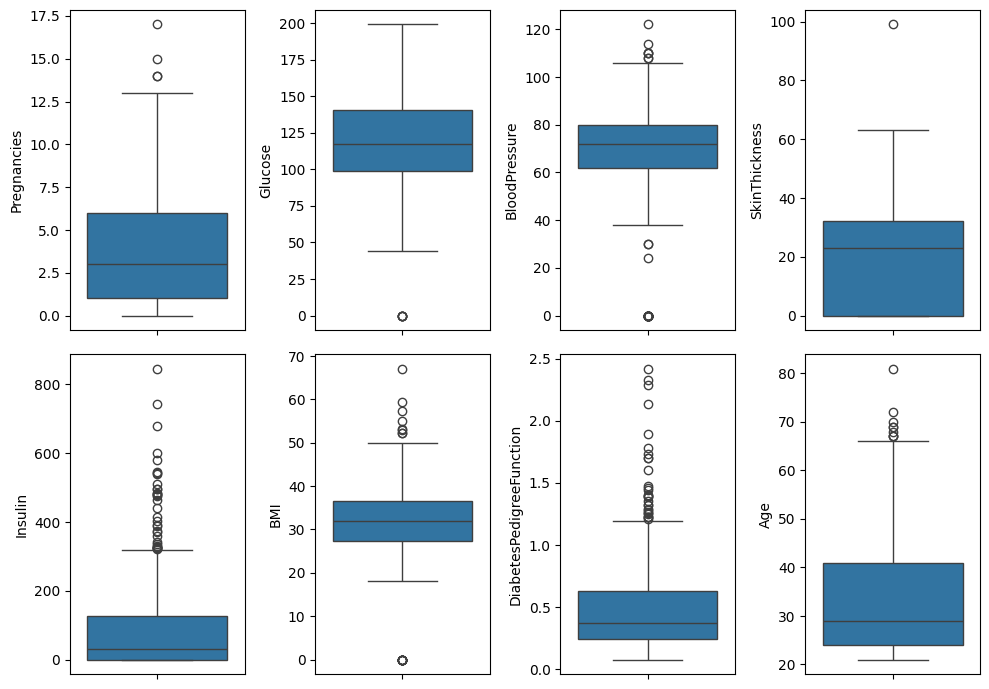

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=X_train, y="Pregnancies")  # Corrected spelling
sns.boxplot(ax=axis[0, 1], data=X_train, y="Glucose")
sns.boxplot(ax=axis[0, 2], data=X_train, y="BloodPressure")
sns.boxplot(ax=axis[0, 3], data=X_train, y="SkinThickness")
sns.boxplot(ax=axis[1, 0], data=X_train, y="Insulin")
sns.boxplot(ax=axis[1, 1], data=X_train, y="BMI")
sns.boxplot(ax=axis[1, 2], data=X_train, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[1, 3], data=X_train, y="Age")

plt.tight_layout()
plt.show()


In [49]:
# Convert columns to float
X_train = X_train.astype({'Pregnancies': 'float', 'BloodPressure': 'float', 'SkinThickness': 'float', 'Insulin': 'float', 'BMI': 'float', 'DiabetesPedigreeFunction': 'float', 'Age': 'float'})
X_test = X_test.astype({'Pregnancies': 'float', 'BloodPressure': 'float', 'SkinThickness': 'float', 'Insulin': 'float', 'BMI': 'float', 'DiabetesPedigreeFunction': 'float', 'Age': 'float'})


In [50]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [51]:
X_train, X_test = replace_outliers(X_train, X_test)

/tmp/ipykernel_10634/2555475927.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '140.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_train.loc[x_train[column] > upper_limit, column] = Q_75
/tmp/ipykernel_10634/2555475927.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '140.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test.loc[x_test[column] > upper_limit, column] = Q_75


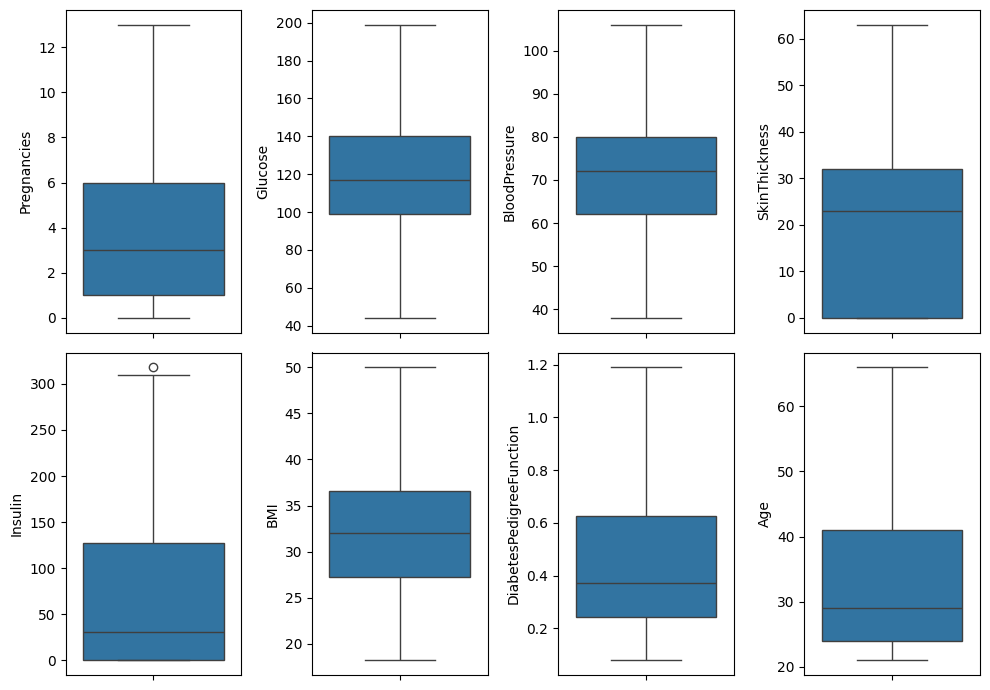

In [52]:
fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=X_train, y="Pregnancies")  # Corrected spelling
sns.boxplot(ax=axis[0, 1], data=X_train, y="Glucose")
sns.boxplot(ax=axis[0, 2], data=X_train, y="BloodPressure")
sns.boxplot(ax=axis[0, 3], data=X_train, y="SkinThickness")
sns.boxplot(ax=axis[1, 0], data=X_train, y="Insulin")
sns.boxplot(ax=axis[1, 1], data=X_train, y="BMI")
sns.boxplot(ax=axis[1, 2], data=X_train, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[1, 3], data=X_train, y="Age")

plt.tight_layout()
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Define a grid of parameters to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Perform grid search
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)

# Retrieve the best parameters
best_params = CV_rf.best_params_
print(f"Best parameters: {best_params}")

# Train the model using the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Best parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.9947916666666666


In [54]:

# Initial model with default parameters
rf_model = RandomForestClassifier(random_state=50) 
rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=50)

In [55]:


# Initial model with default parameters
rf_model = RandomForestClassifier(random_state=100) 
rf_model.fit(X_train, y_train) 


RandomForestClassifier(random_state=100)

In [56]:

# Make prediction on the text data
y_pred = rf_model.predict(X_test)




In [57]:
# Baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Baseline Accuracy:", baseline_accuracy)



Baseline Accuracy: 0.9986979166666666


In [ ]:
# Hyperparameter tuning 
trees = [10, 50, 100, 200]  
depths = [5, 10, 15]  

results = [] 
for n_estimators in trees:
    for max_depth in depths:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': accuracy})



In [ ]:
print(type(results))

<class 'list'>


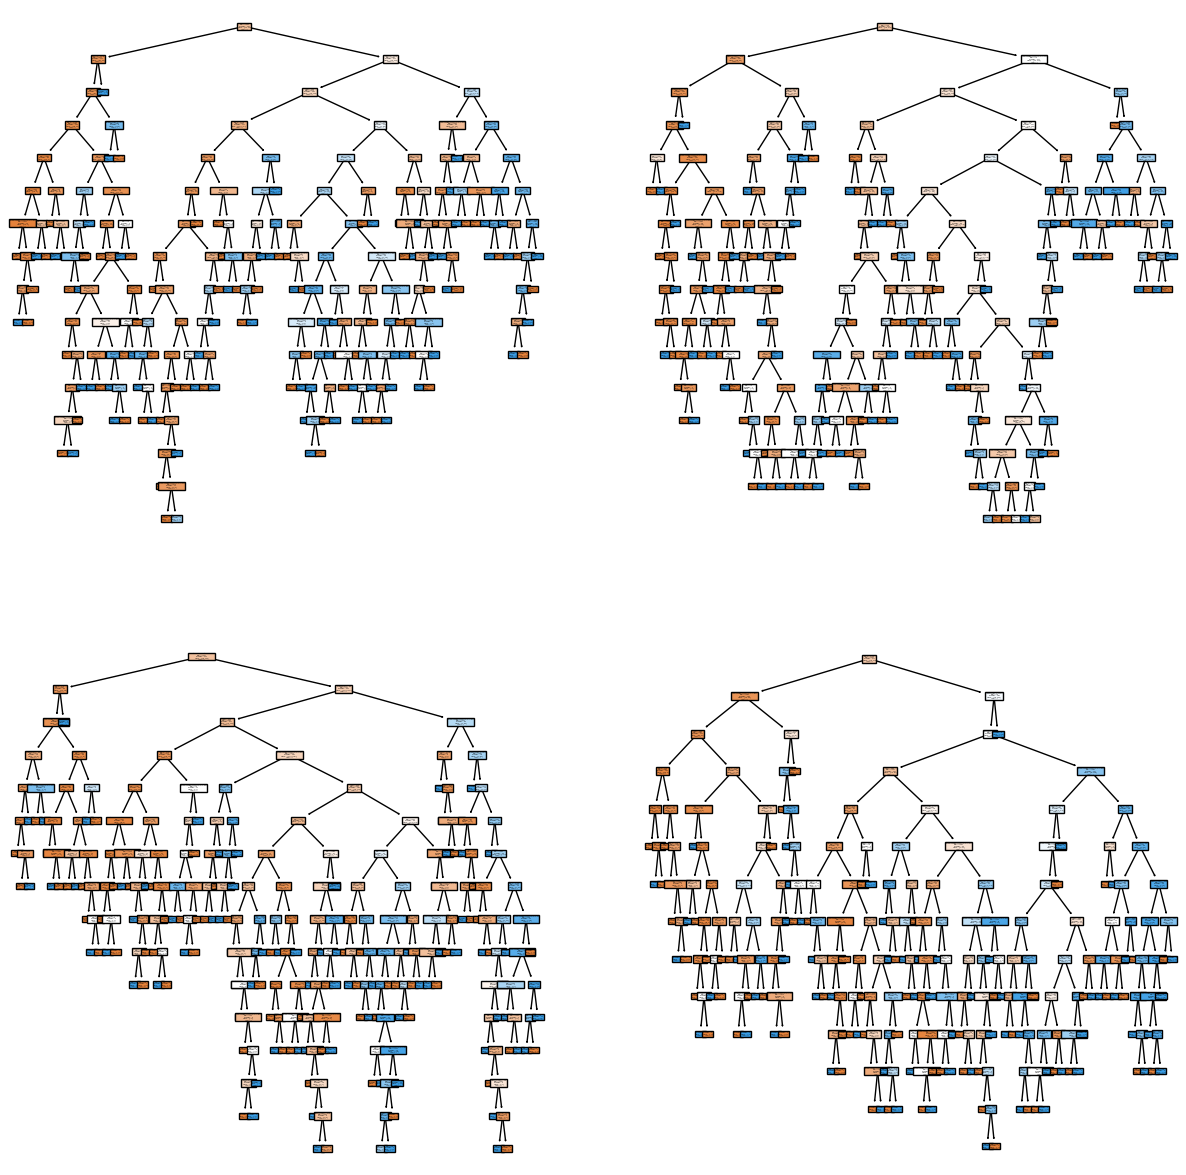

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Iterate over the first four trees and plot them 
for i in range(4):
    tree.plot_tree(model.estimators_[i], ax = axes.flat[i], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [ ]:
# Ramdom forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Make prediction on the test set
y_pred = model.predict(X_test)

#Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [ ]:
print(f"Accuracy with 100 trees: {accuracy}")

Accuracy with 100 trees: 1.0


In [ ]:
from sklearn.metrics import recall_score, precision_score

# ... (Assume you have your model trained and X_test data)

# Get probability estimates
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Different thresholds
thresholds = [0.5, 0.4, 0.3, 0.2]

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype('int')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f"Threshold: {threshold}, Recall: {recall:.2f}, Precision: {precision:.2f}")


Threshold: 0.5, Recall: 1.00, Precision: 1.00
Threshold: 0.4, Recall: 1.00, Precision: 1.00
Threshold: 0.3, Recall: 1.00, Precision: 0.95
Threshold: 0.2, Recall: 1.00, Precision: 0.80


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ... (Load and split your data)

# Model 1:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

# Model 2 (e.g., with more trees in the Random Forest):
model2 = RandomForestClassifier(n_estimators=200)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

# Compare accuracies
print("Accuracy of Model 1:", accuracy1)
print("Accuracy of Model 2:", accuracy2)

Accuracy of Model 1: 1.0
Accuracy of Model 2: 1.0


In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8]
}


In [60]:
from joblib import dump

# Save the model to a file
dump(rf_best, 'random_forest_diabetes_model.joblib')

['random_forest_diabetes_model.joblib']